Paquetes necesarios

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA 1: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

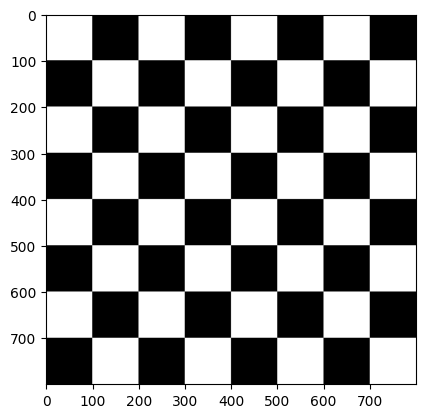

In [191]:
#Creación de la imagen 800x800 en escala de grises
chess_img = np.zeros((800,800,1), dtype = np.uint8)

#Tamaño de los cuadrados 100x100
cuadrado = 100

#Se itera sobre la imagen como si se tratase de un tablero de ajedrez
#Es decir, se recorre por posicion i,j en función de las 8x8 casillas
#de un tablero de ajedrez (0,0), (0,1)...
for i in range(0, 8):
    for j in range (0, 8):
        #Si la suma de i+j es par, se pinta de blanco
        if (i+j) % 2 == 0:
            #Utilizando como alto y ancho la posición i,j se seleccionan las filas
            #y columnas correspondientes para pintar de blanco
            chess_img[i*cuadrado:(i+1)*cuadrado, j*cuadrado:(j+1)*cuadrado] = 255

#Se muestra el tablero de ajedrez
plt.imshow(chess_img, cmap='gray')
plt.show()

TAREA 2: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

(200, 300, 3)


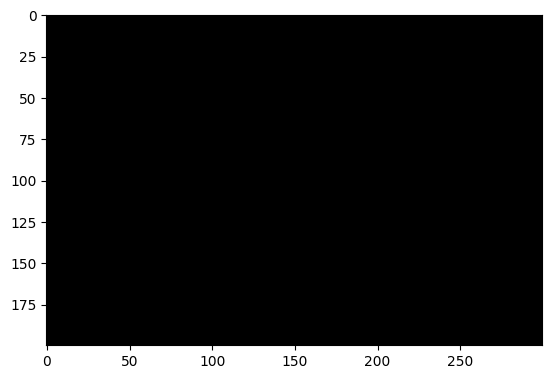

In [151]:
#Inicialización de imagen a color
ancho = 300
alto = 200
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

#Dimensiones
print(color_img.shape)


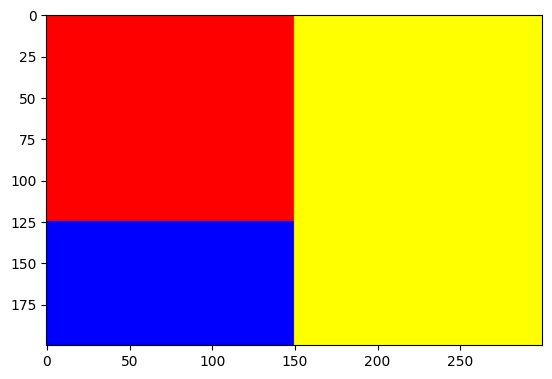

In [152]:
#Se pintan los colores rojo, amarillo y azul
color_img[0:125,0:150,0] = 255

#Combinación de colores para obtener amarillo
color_img[:,150:300,1] = 255
color_img[:,150:300,0] = 255

color_img[125:200,0:150,2] = 255

plt.imshow(color_img)
plt.show()

TAREA 3: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

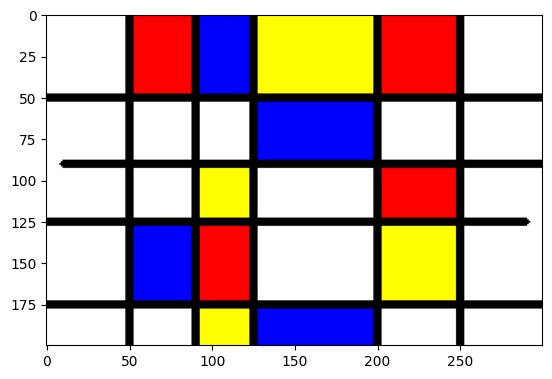

In [153]:
#La tarea resuelta con funciones de OpenCV se trata de la creación de una imagen al estilo Mondrian.

#Se transforma la imagen original al color blanco estableciendo el valor máximo en los canales de color, puesto que fueron modificados anteriormente.
#El blanco se crea de la combinación en RGB (255, 255, 255).

color_img[:,:,0] = 255 
color_img[:,:,1] = 255 
color_img[:,:,2] = 255 

#El bloque de rectángulos de colores usando cv2 los dibujamos primero para que queden encuadrados con las líneas que vendrán después.
#La estructura de la que parte el dibujo de rectángulos en cv2 es: (imagen, (punto inicial x, punto inicial y), (punto final x, punto final y), (color en formato RGB), tipo de grosor).
#El grosor -1 indica que el rectángulo estará relleno.

cv2.rectangle(color_img,(50,0),(90,50),(255,0,0),-1)
cv2.rectangle(color_img,(90,0),(125,50),(0,0,255),-1)
cv2.rectangle(color_img,(90,0),(125,50),(0,0,255),-1)
cv2.rectangle(color_img,(125,0),(200,50),(255,255,0),-1)
cv2.rectangle(color_img,(200,0),(250,50),(255,0,0),-1)
cv2.rectangle(color_img,(125,50),(200,90),(0,0,255),-1)
cv2.rectangle(color_img,(90,90),(125,125),(255,255,0),-1)
cv2.rectangle(color_img,(90,125),(125,175),(255,0,0),-1)
cv2.rectangle(color_img,(50,125),(90,175),(0,0,255),-1)
cv2.rectangle(color_img,(200,125),(250,175),(255,255,0),-1)
cv2.rectangle(color_img,(200,90),(250,125),(255,0,0),-1)
cv2.rectangle(color_img,(125,175),(200,alto),(0,0,255),-1)
cv2.rectangle(color_img,(90,175),(125,alto),(255,255,0),-1)

#El trazado de líneas con cv2 sigue la misma estructura que la del rectángulo, en este caso el grosor de la línea será de 3px.

cv2.line(color_img,(50,0),(50,alto),(0,0,0),3)
cv2.line(color_img,(90,0),(90,alto),(0,0,0),3)
cv2.line(color_img,(125,0),(125,alto),(0,0,0),3)
cv2.line(color_img,(200,0),(200,alto),(0,0,0),3)
cv2.line(color_img,(250,0),(250,alto),(0,0,0),3)
cv2.line(color_img,(0,50),(ancho,50),(0,0,0),3)
cv2.line(color_img,(10,90),(ancho,90),(0,0,0),3)
cv2.line(color_img,(0,125),(ancho-10,125),(0,0,0),3)
cv2.line(color_img,(0,175),(ancho,175),(0,0,0),3)

plt.imshow(color_img) 
plt.show()

TAREA 4: Modifica de forma libre los valores de un plano de la imagen

In [158]:
#Se invierten los colores del canal rojo haciendo la resta del valor máximo (255) por su valor real.

vid = cv2.VideoCapture(0)
  
while(True):      
    #fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        #Inversión de color en el canal rojo
        r = 255 - r
        
        #Dimensiones imagen de entrada
        h, w, c = frame.shape

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, b))
    
        #Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    #Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
#Libera el objeto de captura
vid.release()
#Destruye ventanas
cv2.destroyAllWindows()

TAREA 5:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [187]:
vid = cv2.VideoCapture(0)

#Se obtienen las dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
  
while True:
    #fotograma a fotograma
    ret, frame = vid.read()
    
    #Coordenadas de los puntos mínimo y máximo
    x_min, x_max = 0, 0
    y_min, y_max = 0, 0

    min_brightness = 0            #Brillo mínimo teórico
    max_brightness = 255 * 3 * 64 #Brillo máximo teórico

    if not ret:
        break

    #Iteración sobre la imagen en bloques de 8x8, evitando salirse de los límites
    for i in range(0, h - 8, 8):
        for j in range(0, w - 8, 8):

            #Selección de grupos de 8x8 píxeles
            pixelGroup = frame[i:i+8, j:j+8]

            #Obtención de la suma de los valores de los canales RGB
            pixel_colour_sum = np.sum(pixelGroup[:, :, 0]) + np.sum(pixelGroup[:, :, 1]) + np.sum(pixelGroup[:, :, 2])

            #Se comparan los valores de brillo para obtener los puntos mínimo y máximo
            if pixel_colour_sum < max_brightness:

                #En caso de ser menor al máximo teorico, se establece como nuevo máximo
                max_brightness = pixel_colour_sum

                #Se puede decir entonces que se ha encontrado un punto mínimo, por lo 
                #que se almacenan sus coordenadas
                x_min = j
                y_min = i
            elif pixel_colour_sum > min_brightness:

                #En caso de ser mayor al mínimo teórico, se establece como nuevo mínimo
                min_brightness = pixel_colour_sum

                #Se puede decir entonces que se ha encontrado un punto máximo, por lo
                #que se almacenan sus coordenadas
                x_max = j
                y_max = i

    #Se dibujan los círculos en los puntos máximo y mínimo en rojo y azul respectivamente (BGR)
    cv2.circle(frame, (x_max, y_max), 8, (0, 0, 255), 3)    
    cv2.circle(frame, (x_min, y_min), 8, (255, 0, 0), 3)
                
    cv2.imshow('Cam', frame)
    
    # Detener el programa al presionar ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
vid.release()
# Destruir ventanas
cv2.destroyAllWindows()

TAREA 6: Llevar a cabo una propuesta propia de pop art

In [190]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos con los valores de los planos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = 255 - g
        tr[:,:,2] = 255 - b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = g

        br[:,:,0] = 255 - b
        br[:,:,1] = 255 - g
        br[:,:,2] = r

        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()